# k-Nearest Neighbors

In this notebook, I implement the k-Nearest Neighbors based on the * **Shill Bidding Dataset** *, including KNN classification and KNN regression.

I implement the algorithm with the notes defined in * **Lecture 7. Parametric vs. Nonparametric modeling: The k-Nearest Neighbors Algorithm** *.

## Algorithm Inplement

---
### KNN classification

In the chunk below, I firstly define several functions:
* ```distance(p,q)```: function to compute distance between two points.
* ```k_nearest_neighbors(point, training_features, training_labels, k)```: function to compute the k-nearest neighbors to a given point.
* ```KNN_Predict(point, training_features, training_labels, k, regression = False)```: function to predict the label for a given point.
* ```classification_error(test_features, test_labels,training_features, training_labels,k)```: function to compute the classfication error.

In [9]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [10]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [11]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [12]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/len(test_features)

#### Conduct KNN classification model and check the error performance.

In [26]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


create the training and testing set.

In [16]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
y = df.Class

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

Now let's try the ```k_nearest_neighbors``` function on the last observation of testing set and find the 5 data points' label that closest to it from the training set.

In [17]:
k_nearest_neighbors(X_test.values[-1], X_train.values, y_train.values, 5)

[[array([0.03508772, 0.03921569, 0.        , 0.54781019, 0.64705882,
         0.82525857, 0.49550231, 0.        , 5.        ]),
  0,
  0.04663163959983978],
 [array([0.09090909, 0.03921569, 0.        , 0.56941898, 0.64705882,
         0.82525857, 0.56935648, 0.        , 5.        ]),
  0,
  0.09592872800986757],
 [array([0.0625    , 0.01960784, 0.        , 0.45031944, 0.64705882,
         0.82525857, 0.45031944, 0.        , 5.        ]),
  0,
  0.11954629505361748],
 [array([0.11428571, 0.07843137, 0.        , 0.66490509, 0.64705882,
         0.82525857, 0.55516667, 0.        , 5.        ]),
  0,
  0.17961174816312525],
 [array([0.02777778, 0.02325581, 0.        , 0.56749537, 0.58139535,
         0.99359281, 0.56749537, 0.        , 5.        ]),
  0,
  0.18927209602154865]]

Observe that within the 5 closest points, all of them have label 0. Now let's see the true label of the last observation in the testing set.

In [18]:
y_test.values[-1]

0

The true label of the sample is also 0.

We can examine the established ```KNN_Predict``` function by running the cell below.

In [19]:
KNN_Predict(X_test.values[-1], X_train.values, y_train.values, 5)

0

For k-NN with $k = 5$, the classification error on the test dataset is shown as below.

In [20]:
classification_error(X_test.values, y_test.values, X_train.values, y_train.values, 5)

0.0036900369003690036

### experiment with different $k$ values

Now let's do an experiment with different $k$ values in order to find the optimal value of $k$. 

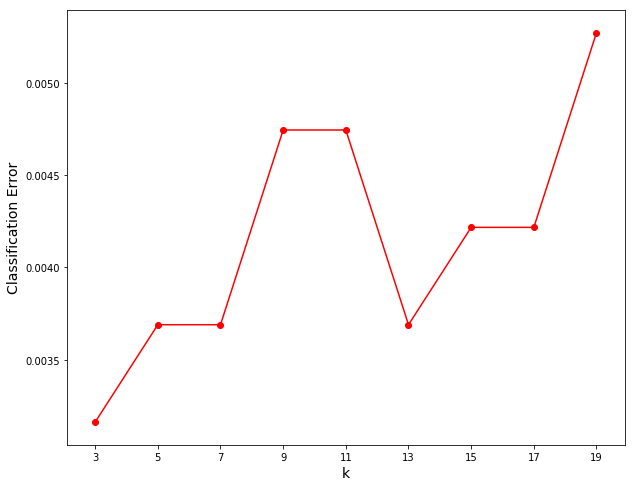

In [16]:
## Choosing the right value for K
possible_k = [x for x in range(3, 20, 2)]
errors = [classification_error(X_test.values,
                               y_test.values,
                               X_train.values,
                               y_train.values, k) for k in possible_k]

plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

From the graph above, we would like to choose $k = 3$, as the k-NN model has the smallest classification error rate which is equal to:

In [21]:
classification_error(X_test.values, y_test.values, X_train.values, y_train.values, 3)

0.0031628887717448603

check the classification report on the test dataset.

In [24]:
y_pred = [KNN_Predict(point, X_train.values, y_train.values, 3, regression=False) for point in X_test.values]

In [27]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1699
          1       0.99      0.97      0.98       198

avg / total       1.00      1.00      1.00      1897



From the result above, we can see that the k-Nearest Neighbors model performs well on the Shill Bidding Dataset.

## k-NN Regression

In this part, we will apply k-NN regression on diabetes dataset from scikit-learn. Still use the same dataset, and the response variable changed to 'Winning_Ratio' which is a continuous variable.

In [33]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Winning_Ratio','Auction_Duration','Class'],axis=1)
y = df.Winning_Ratio

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [34]:
y_pred = [KNN_Predict(point, X_train.values, y_train.values, 3, regression=True) for point in X_test.values]

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R^2 = {round(r2_score(y_test, y_pred), 3)}")

MSE = 0.05538180802649597
R^2 = 0.708


The $R^2$ value is 0.705, meaning that the data fits the regression model well.

### Experiments with different $k$ values.

Text(0.5,1,'adjusted $R^2$ for different k')

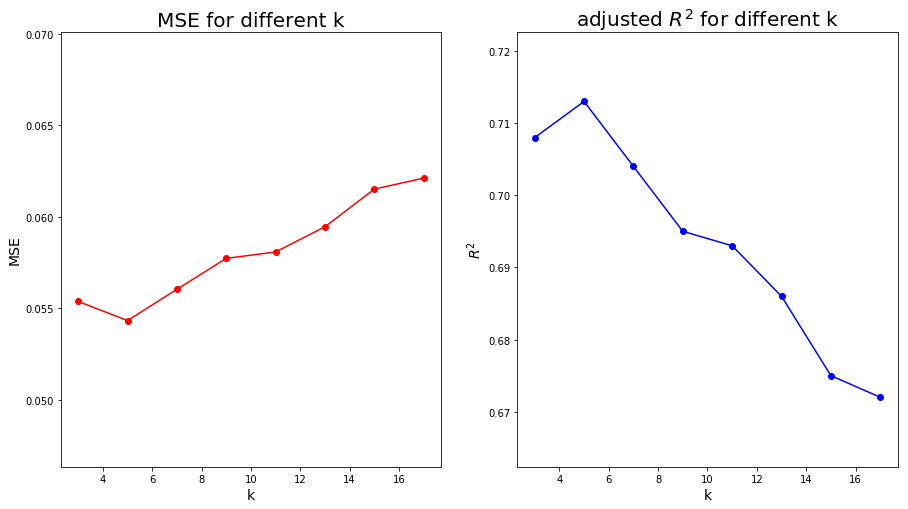

In [37]:
possible_k = [x for x in range(3, 19, 2)]
MSE = []
R2 = []
for k in possible_k:
    y_pred = [KNN_Predict(point, X_train.values, y_train.values, k, regression=True) for point in X_test.values]
    mse = mean_squared_error(y_test, y_pred)
    MSE.append(mse)
    r2 = round(r2_score(y_test, y_pred), 3)
    R2.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.scatter(possible_k, MSE, color = "red")
ax1.plot(possible_k, MSE, color = 'red')
ax1.set_xlabel("k", fontsize = 14)
ax1.set_ylabel("MSE", fontsize = 14)
ax1.set_title('MSE for different k', fontsize = 20)

ax2.scatter(possible_k, R2, color = "blue")
ax2.plot(possible_k, R2, color = 'blue')
ax2.set_xlabel("k", fontsize = 14)
ax2.set_ylabel("$R^2$", fontsize = 14)
ax2.set_title('adjusted $R^2$ for different k', fontsize = 20)

By increasing the $k$ value, the MSE decreases and the $R^2$ increases. The maximum of adjusted $R^2$ is lager than 0.71. As the max_depth increases, the value of adjuested $R^2$ even decreases. The decision tree regressor performs best at k=5.